In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.figure()
bitcoin0 = pd.read_csv("BTC-EUR.csv" , index_col='Date' , parse_dates=True )
bitcoin = bitcoin0.copy()
bitcoin.describe()


,Open,High,Low,Close,Adj Close,Volume
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1.348000e+03
mean,16231.704643,16679.770143,15735.997402,16254.181724,16254.181724,2.150801e+10
std,15286.127782,15698.669214,14810.100316,15293.955835,15293.955835,1.838372e+10
min,2861.808594,2896.387207,2822.041016,2862.239258,2862.239258,2.502071e+09
25%,5842.285523,6091.323609,5749.424805,5850.770386,5850.770386,5.721995e+09
50%,8639.279297,8867.718750,8453.688476,8642.748047,8642.748047,1.766252e+10
75%,27062.672852,27956.465820,25972.759277,27003.163574,27003.163574,3.153216e+10
max,58290.289063,59496.148438,57269.132813,58305.039063,58305.039063,2.907271e+11


<Figure size 432x288 with 0 Axes>

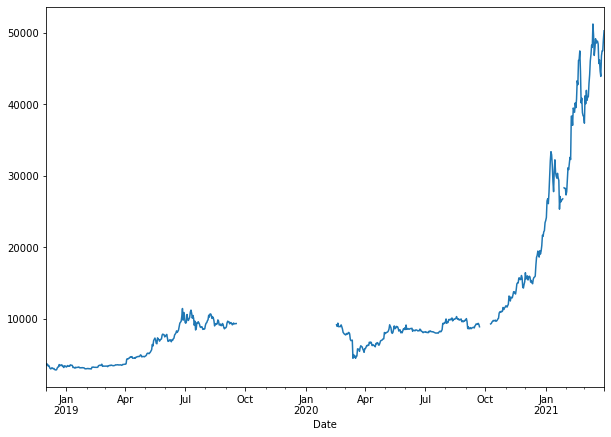

In [3]:
bitcoin["Open"]["2018-12" : "2021-03"].plot(figsize = (10,7))
plt.show()

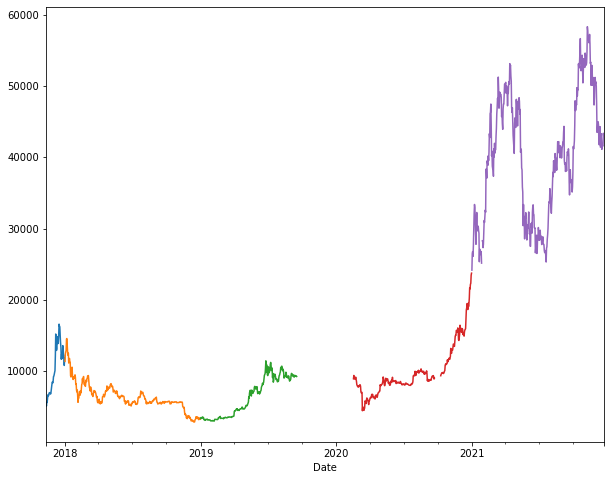

In [4]:
# Regrouper les données par Mois
bitcoin.loc[:,'Close'].resample('Y').plot(figsize =(10,8) )
plt.show()

<AxesSubplot:xlabel='Date'>

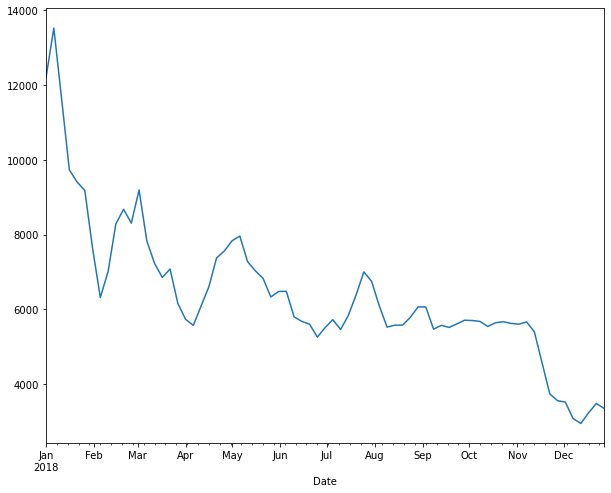

In [5]:
# un peu de statistique
bitcoin.loc["2018" , "Open"].resample('5D').mean().plot(figsize=(10,8))

<AxesSubplot:xlabel='Date'>

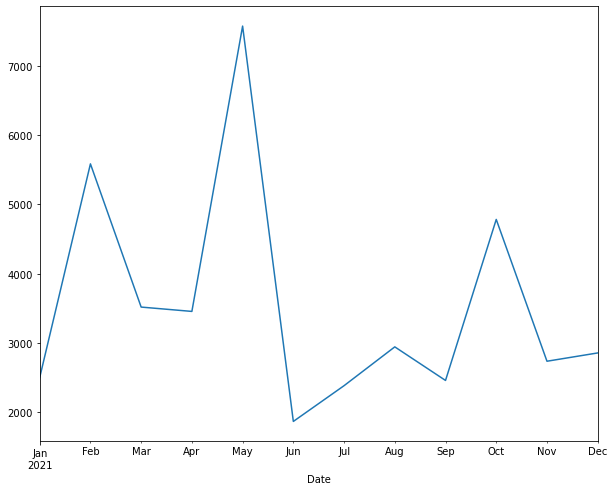

In [6]:
# un peu de statistique
bitcoin.loc["2021" , "Open"].resample('M').std().plot(figsize=(10,8))

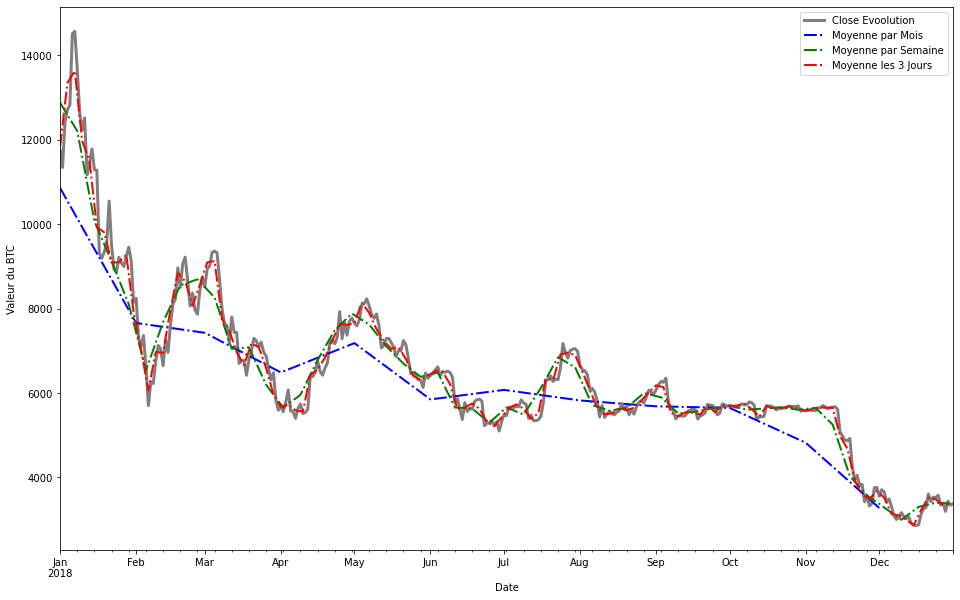

In [7]:
plt.figure(figsize=(16,10))
annee = '2018'
bitcoin.loc[annee,'Open'].plot( label='Close Evoolution' , lw = 3 , ls = "solid" , c = "black" , alpha = 0.5)
bitcoin.loc[annee,'Open'].resample('M').mean().plot( label='Moyenne par Mois' , lw = 2 , ls = "dashdot", c = "blue")
bitcoin.loc[annee,'Open'].resample('W').mean().plot( label='Moyenne par Semaine' , lw = 2 , ls = "dashdot", c = "g")
bitcoin.loc[annee,'Open'].resample('3D').mean().plot( label='Moyenne les 3 Jours' , lw = 2 , ls = "dashdot", c = "red")
plt.ylabel("Valeur du BTC")
plt.legend()
plt.show()

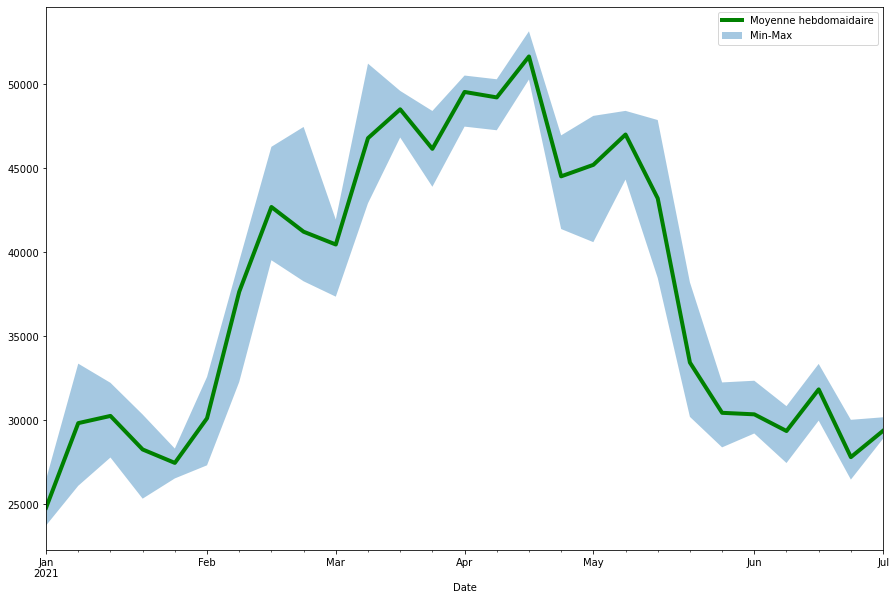

In [8]:
stat = bitcoin.loc["2021-01":"2021-06" , "Open"].resample('W').agg(['mean', 'std' , 'min' , 'max'])
plt.figure(figsize = (15,10))
stat["mean"].plot(label = "Moyenne hebdomaidaire" , ls = 'solid' , lw = 4  , c = 'g')
plt.fill_between( stat.index , stat['min'] , stat['max'] , alpha = 0.4 , label = "Min-Max" )
plt.legend(  )
plt.show()

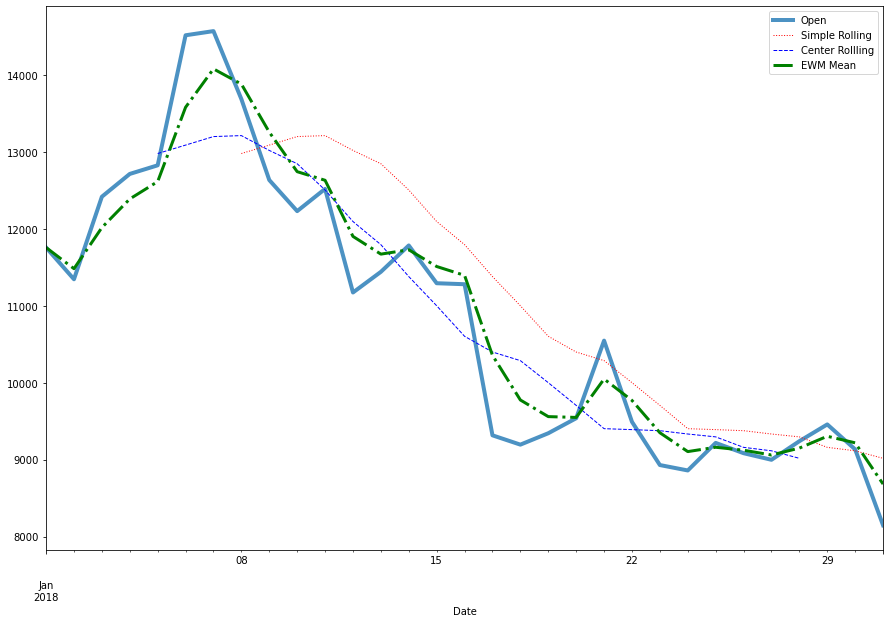

In [9]:
# Effectuer du rolling
plt.figure(figsize = (15,10))
time = '2018-01'
bitcoin.loc[time,"Open"].plot(lw = 4 , alpha = 0.8)
bitcoin.loc[time,"Open"].rolling(window = 8 ).mean().plot(label = 'Simple Rolling', lw = 1 , c = "r" , ls='dotted')
bitcoin.loc[time,"Open"].rolling(window = 8,center=True ).mean().plot(label='Center Rollling', lw = 1 , c = "b", ls='dashed')
bitcoin.loc[time,"Open"].ewm(alpha = 0.5).mean().plot(label='EWM Mean', lw = 3 , c = "g", ls='dashdot') #ewm = Exponetial Weighted Mean
plt.legend(loc = 'best')
plt.show()

In [10]:
# Assemblage de DataFrame

ether = pd.read_csv( "ETH-EUR.csv" , index_col='Date' , parse_dates=True)
ether.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1.349000e+03
mean,839.744316,870.022888,806.321055,841.882034,841.882034,1.075192e+10
std,1025.298482,1060.211871,986.489307,1027.384367,1027.384367,1.003964e+10
min,74.527779,75.467819,73.245728,74.553070,74.553070,5.272051e+08
25%,188.294250,192.832870,182.489212,188.038269,188.038269,2.228433e+09
50%,342.730743,351.662292,330.103088,342.862000,342.862000,7.610428e+09
75%,1060.719360,1136.079346,1007.437134,1053.338745,1053.338745,1.645940e+10
max,4150.726074,4300.855469,4070.346924,4152.465820,4152.465820,6.941572e+10


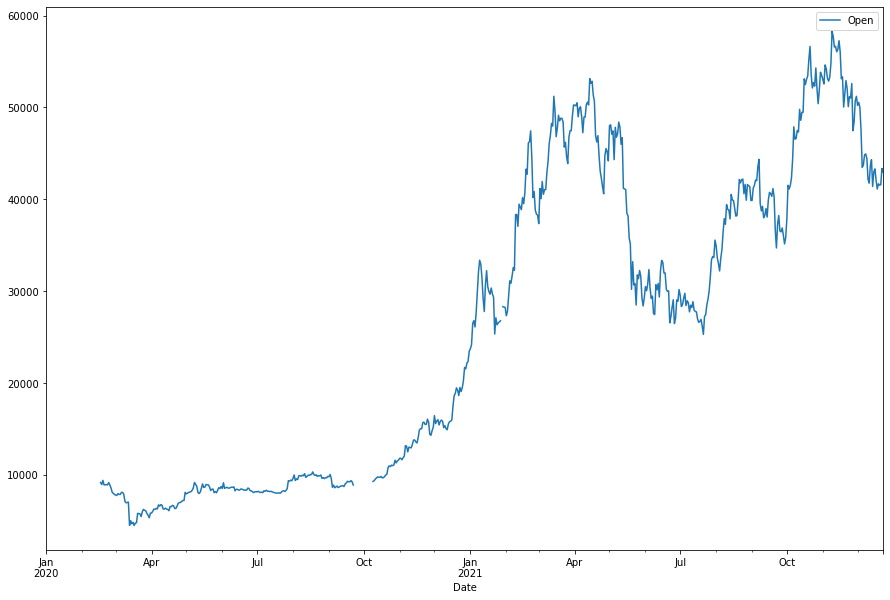

In [11]:
plt.figure(figsize = (15,10))
bitcoin.loc[ "2020":,'Open'].plot()

plt.legend(loc='best')
plt.show()

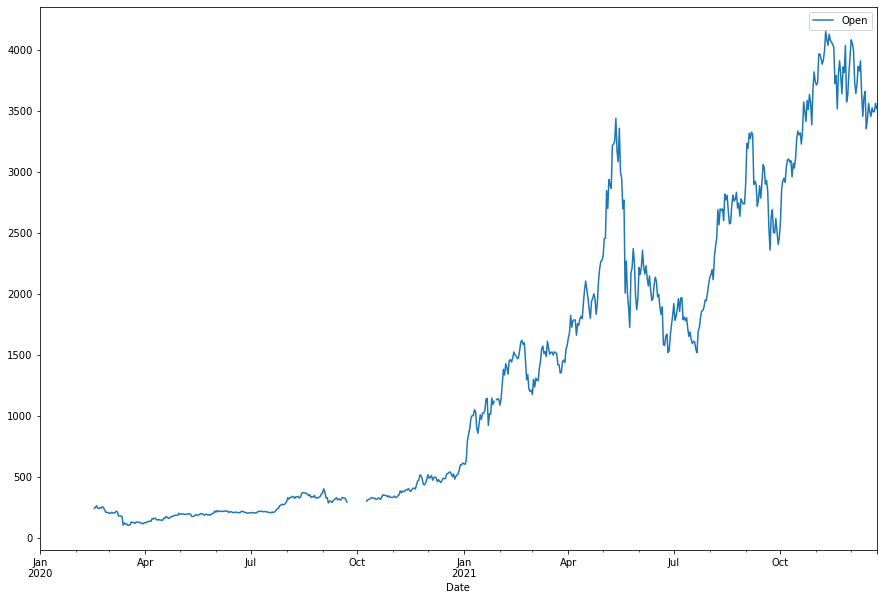

In [12]:
plt.figure(figsize = (15,10))
ether.loc[ "2020":,'Open'].plot()

plt.legend(loc='best')
plt.show()

In [13]:
btc_eth = pd.merge( bitcoin , ether , on='Date' , how ='outer' , suffixes=("_btc","_eth"))
btc_eth.describe()

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1.348000e+03,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1.349000e+03
mean,16231.704643,16679.770143,15735.997402,16254.181724,16254.181724,2.150801e+10,839.744316,870.022888,806.321055,841.882034,841.882034,1.075192e+10
std,15286.127782,15698.669214,14810.100316,15293.955835,15293.955835,1.838372e+10,1025.298482,1060.211871,986.489307,1027.384367,1027.384367,1.003964e+10
min,2861.808594,2896.387207,2822.041016,2862.239258,2862.239258,2.502071e+09,74.527779,75.467819,73.245728,74.553070,74.553070,5.272051e+08
25%,5842.285523,6091.323609,5749.424805,5850.770386,5850.770386,5.721995e+09,188.294250,192.832870,182.489212,188.038269,188.038269,2.228433e+09
50%,8639.279297,8867.718750,8453.688476,8642.748047,8642.748047,1.766252e+10,342.730743,351.662292,330.103088,342.862000,342.862000,7.610428e+09
75%,27062.672852,27956.465820,25972.759277,27003.163574,27003.163574,3.153216e+10,1060.719360,1136.079346,1007.437134,1053.338745,1053.338745,1.645940e+10
max,58290.289063,59496.148438,57269.132813,58305.039063,58305.039063,2.907271e+11,4150.726074,4300.855469,4070.346924,4152.465820,4152.465820,6.941572e+10


<Figure size 1080x720 with 0 Axes>

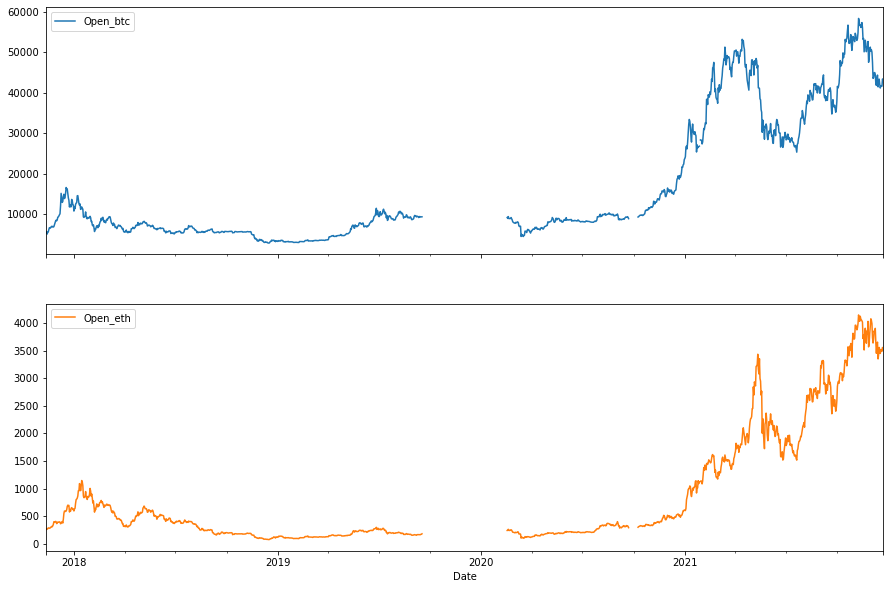

In [14]:
plt.figure(figsize=(15,10))
btc_eth[["Open_btc" , "Open_eth"]].plot(subplots = True , figsize=(15,10))
plt.legend()
plt.show()

In [15]:
# Calcul de la correlation entre les deux cryptomonaies
btc_eth[["Close_btc","Close_eth"]].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.918696
Close_eth,0.918696,1.000000


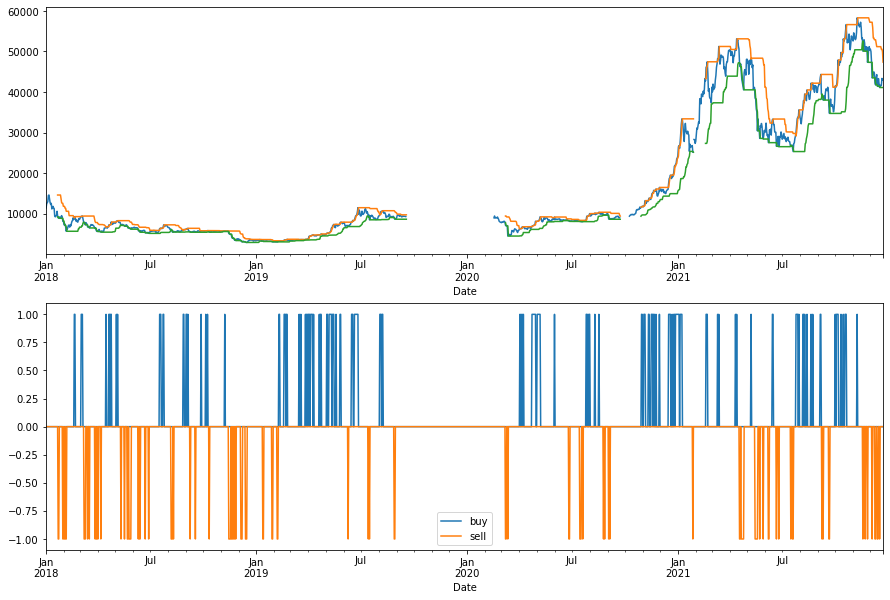

In [16]:
# Trading Strategie
bitcoin = bitcoin.loc["2018":,:]
bitcoin["sell"] = bitcoin["buy"]= np.zeros(len(bitcoin))
bitcoin['min'] = bitcoin["Close"].shift(1).rolling(window = 20).min()
bitcoin["max"] = bitcoin["Close"].shift(1).rolling(window = 20).max()
bitcoin.loc[bitcoin['Close'] > bitcoin['max'] , "buy"] = 1
bitcoin.loc[bitcoin['Close'] < bitcoin['min'] , "sell"] = -1

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
bitcoin["Close"].plot()
bitcoin['max'].plot()
bitcoin['min'].plot()
plt.subplot(2,1,2)
bitcoin['buy'].plot()
bitcoin['sell'].plot()
plt.legend(loc='best')
plt.show()

In [17]:
bitcoin.describe()

,Open,High,Low,Close,Adj Close,Volume,sell,buy,min,max
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1.297000e+03,1453.000000,1453.000000,1207.000000,1207.000000
mean,16459.144433,16901.155328,15966.802110,16477.909737,16477.909737,2.201686e+10,-0.076394,0.115623,14539.542558,18308.742284
std,15524.831788,15947.841704,15039.151288,15534.837429,15534.837429,1.853782e+10,0.265718,0.319882,13937.130250,17380.413566
min,2861.808594,2896.387207,2822.041016,2862.239258,2862.239258,2.502071e+09,-1.000000,0.000000,2862.239258,3237.059326
25%,5807.015137,5925.708496,5697.229004,5808.230469,5808.230469,5.963067e+09,0.000000,0.000000,5383.270508,6564.486084
50%,8607.630859,8797.558594,8423.846680,8610.188477,8610.188477,1.897545e+10,0.000000,0.000000,7958.571289,9245.743164
75%,27790.726563,28802.804688,26690.492188,27790.582031,27790.582031,3.197155e+10,0.000000,0.000000,25299.851563,32750.033203
max,58290.289063,59496.148438,57269.132813,58305.039063,58305.039063,2.907271e+11,0.000000,1.000000,52591.960938,58305.039063


In [18]:
arbres = pd.read_csv("les-arbres.csv" , sep =";")
arbres

,IDBASE,TYPE EMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENT ADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLE FRANCAIS,GENRE,ESPECE,VARIETE OUCULTIVAR,CIRCONFERENCE (cm),HAUTEUR (m),STADE DE DEVELOPPEMENT,REMARQUABLE,geo_point_2d
0,282473,Arbre,Alignement,PARIS 17E ARRDT,NaN,NaN,RUE GUY MOQUET,001402008,Poirier à fleurs,Pyrus,calleryana,''Chanticleer'',50,6,Adulte,NON,"48.892583925565674,2.325724926928105"
1,2000392,Arbre,Alignement,BOIS DE BOULOGNE,NaN,NaN,BOULEVARD DU COMMANDANT CHARCOT,000206019,Marronnier,Aesculus,hippocastanum,NaN,200,16,Adulte,NON,"48.87611398662748,2.256416700481109"
2,168291,Arbre,CIMETIERE,PARIS 17E ARRDT,NaN,NaN,CIMETIERE DES BATIGNOLLES / AVENUE PRINCIPALE ...,A14000005005,Tilleul,Tilia,mongolica,NaN,20,5,Jeune (arbre),NON,"48.89677912788158,2.313879150252018"
3,2013247,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,INSEP / AVENUE DU TREMBLAY,00160020,Robinier,Robinia,pseudoacacia,NaN,80,13,Jeune (arbre)Adulte,NON,"48.83346603748706,2.447868487036772"
4,2015471,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,00230117,Pin,Pinus,mugo,NaN,0,0,NaN,NON,"48.83785666128705,2.444189184395655"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203955,246622,Arbre,Alignement,PARIS 14E ARRDT,NaN,NaN,RUE FROIDEVAUX,000402010,Tilleul,Tilia,cordata,NaN,125,10,Jeune (arbre)Adulte,NON,"48.83553299537222,2.329177281561242"
203956,155052,Arbre,CIMETIERE,SEINE-SAINT-DENIS,NaN,NaN,CIMETIERE DE SAINT-OUEN ANCIEN / AVENUE DE L''...,A02000010028,Noisetier de Byzance,Corylus,colurna,NaN,85,9,Jeune (arbre)Adulte,NON,"48.90647897990509,2.3510984949585962"
203957,168633,Arbre,CIMETIERE,VAL-DE-MARNE,NaN,NaN,CIMETIERE DE THIAIS / AVENUE PRINCIPALE SUD / ...,A14200020006,Tilleul,Tilia,cordata,NaN,0,0,NaN,NaN,"48.763731023515184,2.371353312118119"
203958,278930,Arbre,Alignement,PARIS 13E ARRDT,NaN,NaN,AVENUE DE LA PORTE D ITALIE,000305001,Tilleul,Tilia,tomentosa,NaN,110,12,Adulte,NON,"48.817982051372816,2.360243150687402"
